<a href="https://colab.research.google.com/github/saradhasarah12/Deep_Learning_project_Showcase/blob/main/Movie_Recommender_system_using_RBM_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
movies_df = pd.read_csv('/content/movies.dat', encoding='latin-1',sep='::', header=None, engine='python')
print(movies_df.head())


   0                                   1                             2
0  1                    Toy Story (1995)   Animation|Children's|Comedy
1  2                      Jumanji (1995)  Adventure|Children's|Fantasy
2  3             Grumpier Old Men (1995)                Comedy|Romance
3  4            Waiting to Exhale (1995)                  Comedy|Drama
4  5  Father of the Bride Part II (1995)                        Comedy


In [ ]:
ratings_df = pd.read_csv('/content/ratings.dat', encoding='latin-1',sep='::',header=None, engine='python')
print(ratings_df.head())

   0     1  2          3
0  1  1193  5  978300760
1  1   661  3  978302109
2  1   914  3  978301968
3  1  3408  4  978300275
4  1  2355  5  978824291


In [ ]:
# Lets rename our columns in these data frames so we can convey their data better
movies_df.columns = ['MovieID', 'Title', 'Genres']
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

In [ ]:
print(movies_df.head())
print(ratings_df.head())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [ ]:
print('The Number of Movies in Dataset', len(movies_df))

The Number of Movies in Dataset 3883


In [ ]:
movies_df['List Index'] = movies_df.index
print(movies_df.head())

# Merge movies_df with ratings_df by MovieID
merged_df = movies_df.merge(ratings_df, on='MovieID')

# Drop unnecessary columns
merged_df = merged_df.drop('Timestamp', axis=1).drop('Title', axis=1).drop('Genres', axis=1)

# Display the result
print(merged_df.head())

# Lets Group up the Users by their user ID's
user_Group = merged_df.groupby('UserID')
print(user_Group.head())

   MovieID                               Title                        Genres  \
0        1                    Toy Story (1995)   Animation|Children's|Comedy   
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2        3             Grumpier Old Men (1995)                Comedy|Romance   
3        4            Waiting to Exhale (1995)                  Comedy|Drama   
4        5  Father of the Bride Part II (1995)                        Comedy   

   List Index  
0           0  
1           1  
2           2  
3           3  
4           4  
   MovieID  List Index  UserID  Rating
0        1           0       1       5
1        1           0       6       4
2        1           0       8       4
3        1           0       9       5
4        1           0      10       5
        MovieID  List Index  UserID  Rating
0             1           0       1       5
1             1           0       6       4
2             1           0       8       4
3            

In [ ]:
# Amount of users used for training
amountOfUsedUsers = 1000

# Creating the training list
trX = []

# For each user in the group
for userID, curUser in user_Group:

    # Create a temp that stores every movie's rating
    temp = [0]*len(movies_df)

    # For each movie in curUser's movie list
    for num, movie in curUser.iterrows():

        # Divide the rating by 5 and store it
        temp[movie['List Index']] = movie['Rating']/5.0

    # Add the list of ratings into the training list
    trX.append(temp)

    # Check to see if we finished adding in the amount of users for training
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1
print(trX)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
              # Setting the models Parameters
moviesddenUnitsnUnihiddenUnitsts = 50
visibleUnits = len(movimoviesmoviesesmovies_df)
vb = tf.placeholder(moviesCreate[visibleUnits])  # Number of unique movies
hb = tf.placeholder(tf.float32, [hiddenUnits])  # Number of features were going to learn
W = tf.placeholder(tf.float32, [visibleUnits, hiddenUnits])  # Weight Matrix

# Phase 1: Input Processing
v0 = tf.placeholder("float", [None, visibleUnits])
_h0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)  # Visible layer activation
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))  # Gibb's Sampling

# Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb)  # Hidden layer activation
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [ ]:
# Learning rate
alpha = 1.0

# CreaCreatete the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)

# Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])

# Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

# Set the error function, here we use Mean Absolute Error Function
err = v0 - v1
err_sum = tf.reduce_mean(err*err)

Instructions for updating:
Use `tf.cast` instead.


In [ ]:
# Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)

# Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)

# Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)

# Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)

# Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)

# Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())


0.12261943
0.08223802
0.068195246
0.060697418
0.05496743
0.050348148
0.046203904
0.04471901
0.04393329
0.043201856
0.042503763
0.041874982
0.041444454
0.040959444
0.04027895


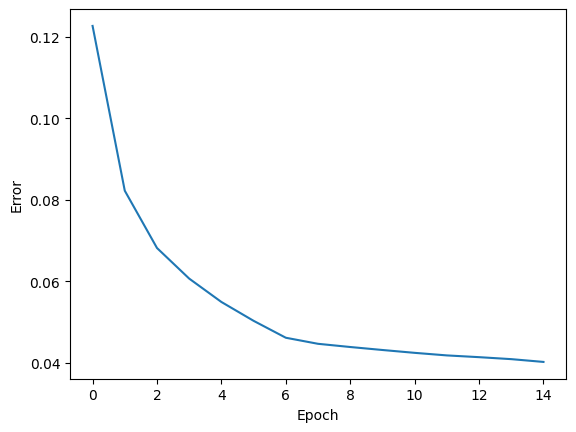

In [ ]:

# Train RBM with 15 Epochs, with Each Epoch using 10 batches with size 100, After training print out the error by epoch
epochs = 15
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip(range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
    print(errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Select the input User
inputUser = [trX[50]]

# Feeding in the User and Reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={hh0: feed, W: prv_w, vb: prv_vb})

# List the 20 most recommended movies for our mock user by sorting it by their scores given by our model.
scored_movies_df_50 = movies_df
scored_movies_df_50["Recommendation Score"] = rec[0]
print(scored_movies_df_50.sort_values(["Recommendation Score"], ascending=False).head(20))

""" Recommend User what movies he has not watched yet """

# Find the mock user's UserID from the data
print(merged_df.iloc[50])  # Result you get is UserID 150

# Find all movies the mock user has watched before
movies_df_50 = merged_df[merged_df['UserID'] == 150]
print(movies_df_50.head())

      MovieID                                      Title  \
2789     2858                     American Beauty (1999)   
1959     2028                 Saving Private Ryan (1998)   
2327     2396                 Shakespeare in Love (1998)   
315       318           Shawshank Redemption, The (1994)   
589       593           Silence of the Lambs, The (1991)   
476       480                       Jurassic Park (1993)   
0           1                           Toy Story (1995)   
257       260  Star Wars: Episode IV - A New Hope (1977)   
1575     1617                   L.A. Confidential (1997)   
108       110                          Braveheart (1995)   
604       608                               Fargo (1996)   
3509     3578                           Gladiator (2000)   
523       527                    Schindler's List (1993)   
3682     3751                         Chicken Run (2000)   
3091     3160                            Magnolia (1999)   
2693     2762                    Sixth S

In [ ]:

# Merging movies_df with ratings_df by MovieID
merged_df_50 = scored_movies_df_50.merge(movies_df_50, on='MovieID', how='outer')

# Dropping unnecessary columns
merged_df_50 = merged_df_50.drop('List Index_y', axis=1).drop('UserID', axis=1)

# Sort and take a look at first 20 rows
print(merged_df_50.sort_values(['Recommendation Score'], ascending=False).head(20))

      MovieID                                      Title  \
2789     2858                     American Beauty (1999)   
1959     2028                 Saving Private Ryan (1998)   
2327     2396                 Shakespeare in Love (1998)   
315       318           Shawshank Redemption, The (1994)   
589       593           Silence of the Lambs, The (1991)   
476       480                       Jurassic Park (1993)   
0           1                           Toy Story (1995)   
257       260  Star Wars: Episode IV - A New Hope (1977)   
1575     1617                   L.A. Confidential (1997)   
108       110                          Braveheart (1995)   
604       608                               Fargo (1996)   
3509     3578                           Gladiator (2000)   
523       527                    Schindler's List (1993)   
3682     3751                         Chicken Run (2000)   
3091     3160                            Magnolia (1999)   
2693     2762                    Sixth S